# 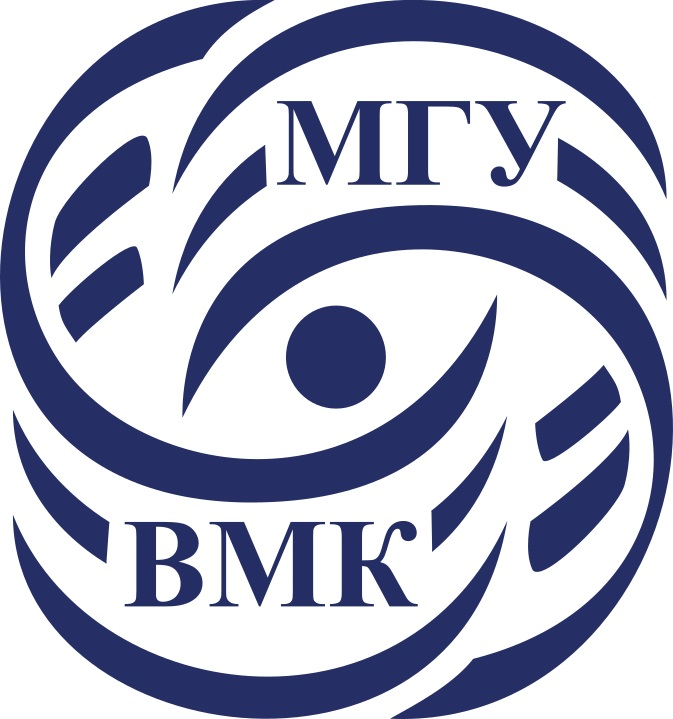

# Машинное обучение. ВМК МГУ

# Практическое задание 6: Линейные модели: классификация

## Уровень: <font color='SkyBlue'>**Базовый (Base)**</font>

# О формате сдачи

🔷 **<font color='plum'>При решении ноутбука используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, обычно помечаются фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличе работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, обычно помечаются фразами Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Обычно выводы подразумевают под собой текстовый ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

-----------
<font color="white" style="opacity:0.2024"></font>







Цель данного задания:

* Узнать, что такое переобучение и как с ним бороться в линейных моделях;
* Научиться работать с разными типами признаков;
* Понять, чем отличаются разные регуляризаторы;
* Приятно провести осенний вечер, предсказывая дождь.

---

<font color=DarkOrange>**Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: до 30 минут </font>**

# Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

<font color='OrangeRed'>**Важно!**</font>

Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

<font color='OrangeRed'>**Важно!**</font>
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-24-25/blob/main/tutorials/%D0%A2%D1%83%D1%82%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%20%D0%BF%D0%BE%20%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5%20%D1%80%D0%B0%D0%B1%D0%BE%D1%87%D0%B5%D0%B3%D0%BE%20%D0%BE%D0%BA%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B2%20Python%20%D0%B4%D0%BB%D1%8F%20%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%20(2).pdf)


In [5]:
# !!! Данный блок будет работать только в Google-Colab !!!
! gdown 10k8Hwn9kpK9SpK4IEj4-EaWQZqgYT5-Q
! pip install -r /content/requirements_2024_25_for_colab_small.txt

Downloading...
From: https://drive.google.com/uc?id=10k8Hwn9kpK9SpK4IEj4-EaWQZqgYT5-Q
To: /home/andrey/Desktop/ml_cmc/base_6/requirements_2024_25_for_colab_small.txt
100%|██████████████████████████████████████████| 375/375 [00:00<00:00, 1.92MB/s]
ERROR: Could not open requirements file: [Errno 2] No such file or directory: '/content/requirements_2024_25_for_colab_small.txt'


Проверим версию библиотеки:

In [6]:
import catboost
assert(catboost.__version__ == '1.2.7')

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2024"></font>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
sns.set(style="darkgrid")
%matplotlib inline

## Часть 1. Классификация

Напомним, что бинарная линейная классификация с классами $0$ и $1$ &mdash; это модель следующего вида:
$a(x)= \begin{cases}
1, & \langle w, x \rangle + b > 0; \\
0, & \text{иначе.}
\end{cases}$

где  $w \in \mathbb{R}^d$,  $b \in \mathbb{R}$. В логистической регрессии $p(x) = \frac{1}{1 + e^{-[\langle w, x \rangle + b]}}$ интерпретируется как вероятность принадлежности к первому классу. Если объект $x$ принадлежит классу $1$ с вероятностью $p(x)$, то правдоподобие записывается в виде $\prod_{i=1}^{n} p(x_i)^{y_i} \cdot \left( 1 - p(x_i) \right)^{1 - y_i}$. Обучить логистическую регрессию означает найти параметры $w$ и $b$, которые максимизируют указанное правдоподобие. Что эквивалентно минимизации $- \sum_{i=1}^n y_i \log p(x_i) + (1 - y_i) \log (1 - p(x_i))$. Указанная функция потерь называет логистической (или логлосс).

По тем же причинам, что и в линейной регрессии, к логистической функции потерь добавляется регуляризация (стандартно это $l_2$).

### <font color='DarkOrange'>**Задание 1 [1 балл]**</font>

Можно ли использовать  $𝑙_1$  регуляризацию в логистической регрессии?

<font color='MediumOrchid'>**Ваш ответ тут:**</font>

Да, можно.

Давайте рассмотрим модельный пример.

$x_1 \sim Uniform(0, 1)$, $x_2 \sim Uniform(0, 1)$

$y(x_1, x_2)= \begin{cases}
0, & x_1 + x_2 < 5; \\
1, & \text{иначе.}
\end{cases}$

Сгенерируем данные и выучим логистическую регрессию, визуализировав полученный результат.

In [8]:
np.random.seed(1)
X1 = np.random.uniform(0, 5, 100)
X2 = np.random.uniform(0, 5, 100)
X = np.hstack((X1[:, None], X2[:, None]))
Y = np.where(X1 + X2 < 5, 0, 1)

In [9]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2')
clf.fit(X, Y)

LogisticRegression()

In [10]:
from matplotlib.colors import ListedColormap

def plot_separating_surface(X, y, cls, view_support=False):
    x_min = min(X[:, 0]) - 0.1
    x_max = max(X[:, 0]) + 0.1
    y_min = min(X[:, 1]) - 0.1
    y_max = max(X[:, 1]) + 0.1
    h = 0.005
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    Z = cls.predict(np.c_[xx.ravel(), yy.ravel()])

    plt.figure(figsize=(8, 8))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=40, cmap=cm_bright)
    if view_support:
        plt.scatter(X[cls.support_, 0], X[cls.support_, 1],
                    c=y[cls.support_], edgecolors='k', s=150, cmap=cm_bright)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.3)
    plt.title("Визуализация прогнозатора", size=15)
    plt.xlabel(r'$x_1$', size=15)
    plt.ylabel(r'$x_2$', size=15)

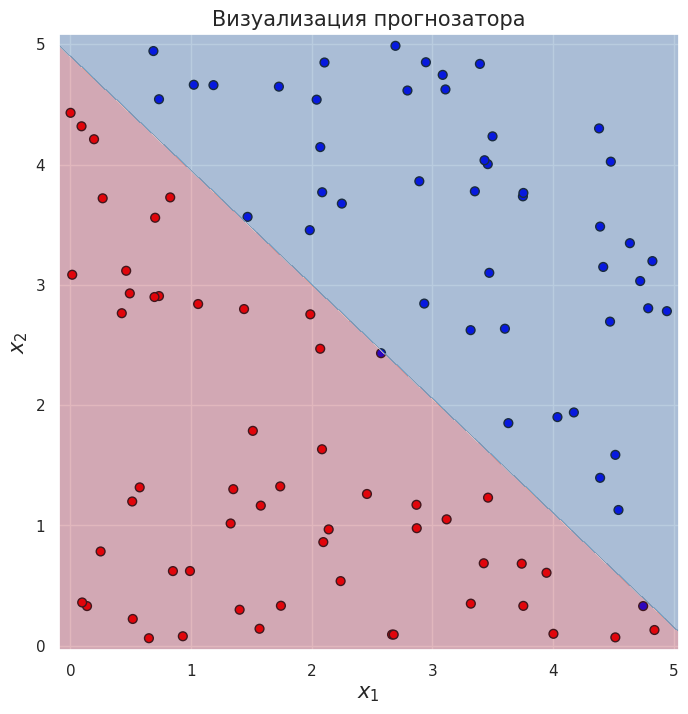

In [11]:
plot_separating_surface(X, Y, clf)

### <font color='DarkOrange'>**Задание 2 [2 баллa]**</font>
Придумайте, сгенерируйте и визуализируйте пример (рекомендуется использовать написанную выше функцию plot_separating_surface), в котором логистическая регрессия будет плохо классифицировать данные.


Точность на тестовой выборке: 0.49


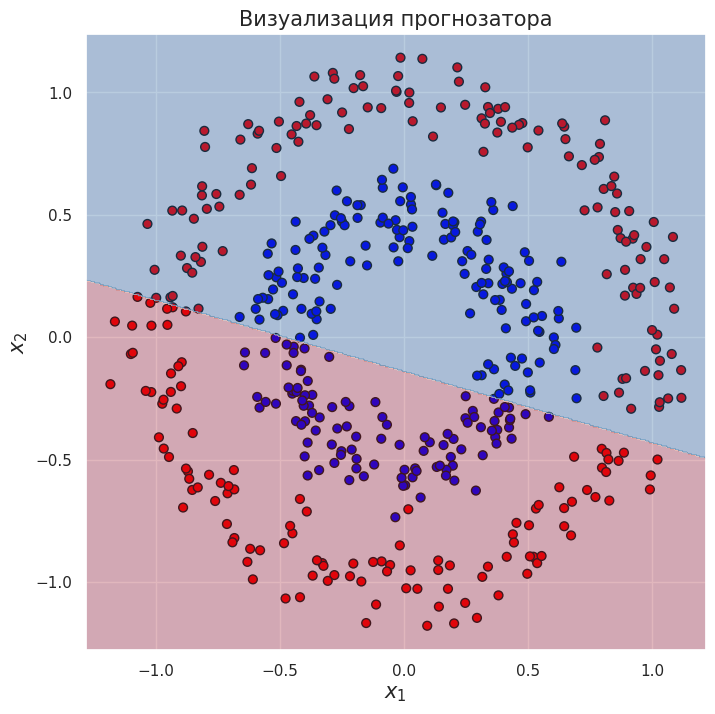

In [12]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_circles(n_samples=500, factor=0.5, noise=0.1, random_state=5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f"Точность на тестовой выборке: {score :.2f}")

plot_separating_surface(X, y, model)

<font color='MediumOrchid'>**Ваш ответ тут (для доп. комментариев):**</font>

Логистическая регрессия не может правильно классифицировать данные с нелинейной зависимостью.

## Обучение на реальных данных

Рассмотрим набор данных от метеорологической службы одной страны. В нём требуется предсказать, будет ли дождь на следующий день.

Для начала, скачаем данные

In [13]:
!gdown 1AgUMxgMK-eRjzthevCk9g-J_s2vpBFpe

Downloading...
From: https://drive.google.com/uc?id=1AgUMxgMK-eRjzthevCk9g-J_s2vpBFpe
To: /home/andrey/Desktop/ml_cmc/base_6/weatherAUS.csv
100%|██████████████████████████████████████| 14.1M/14.1M [00:00<00:00, 50.8MB/s]


In [14]:
df = pd.read_csv("weatherAUS.csv")
df.tail(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


### <font color='DarkOrange'>**Задание 3 [1 балл]**</font>

Что это за страна? Подсказка: жители этой страны воспользовались бы методом tail вместо head :)

<font color='MediumOrchid'>**Ваш ответ тут:**</font>

Эта страна - Австралия.

Извлечём немного информации из набора данных

In [15]:
df.shape

(145460, 23)

In [16]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Внимательно приглядимся к столбцам. Напомним, что мы предсказываем значение RainTomorrow. Давайте посмотрим, на этот столбец

In [17]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

Целевая переменная содержит неопределённые значения! Их нужно удалить из всей выборки. Также, переименуем 'Yes' и 'No' в $1$ и $0$.

In [18]:
df = df[df['RainTomorrow'] == df['RainTomorrow']]
df['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1., 'No': 0.})
df['RainToday'] = df['RainToday'].map({'Yes': 1., 'No': 0.})

In [20]:
print(df.shape)

(142193, 23)


Объектов стало чуть-чуть поменьше. Давайте выведем немного информации о них

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null   fl

Как видим, у нас есть 17 признаков имеющих вещественные значения (вещественные признаки), и 5 признаков типа object (категориальные признаки). Для них требуется отдельная предобработка. Пока разобьём выборку на обучающую и тестовую.

In [22]:
from sklearn.model_selection import train_test_split

<img src="https://img.devrant.com/devrant/rant/r_2416968_UUKQJ.jpg" width=360 height=760 />

In [23]:
y = df.RainTomorrow
X = df.drop(columns=["RainTomorrow"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

In [24]:
X_train.shape

(99535, 22)

#### Вещественные признаки

Как вы могли заметить, среди вещественных и категориальных признаков есть пропущенные значения. В случае с вещественными признаками, пропущенные значения заполняют средним, медианой, нулём или даже пытаются предсказывать по другим признакам. Мы заполним медианой

In [25]:
numeric_data = X_train.select_dtypes([np.number])
numeric_data_median = numeric_data.median()
numeric_features = numeric_data.columns
X_train = X_train.fillna(numeric_data_median)
X_test = X_test.fillna(numeric_data_median)

In [26]:
len(numeric_features)

17

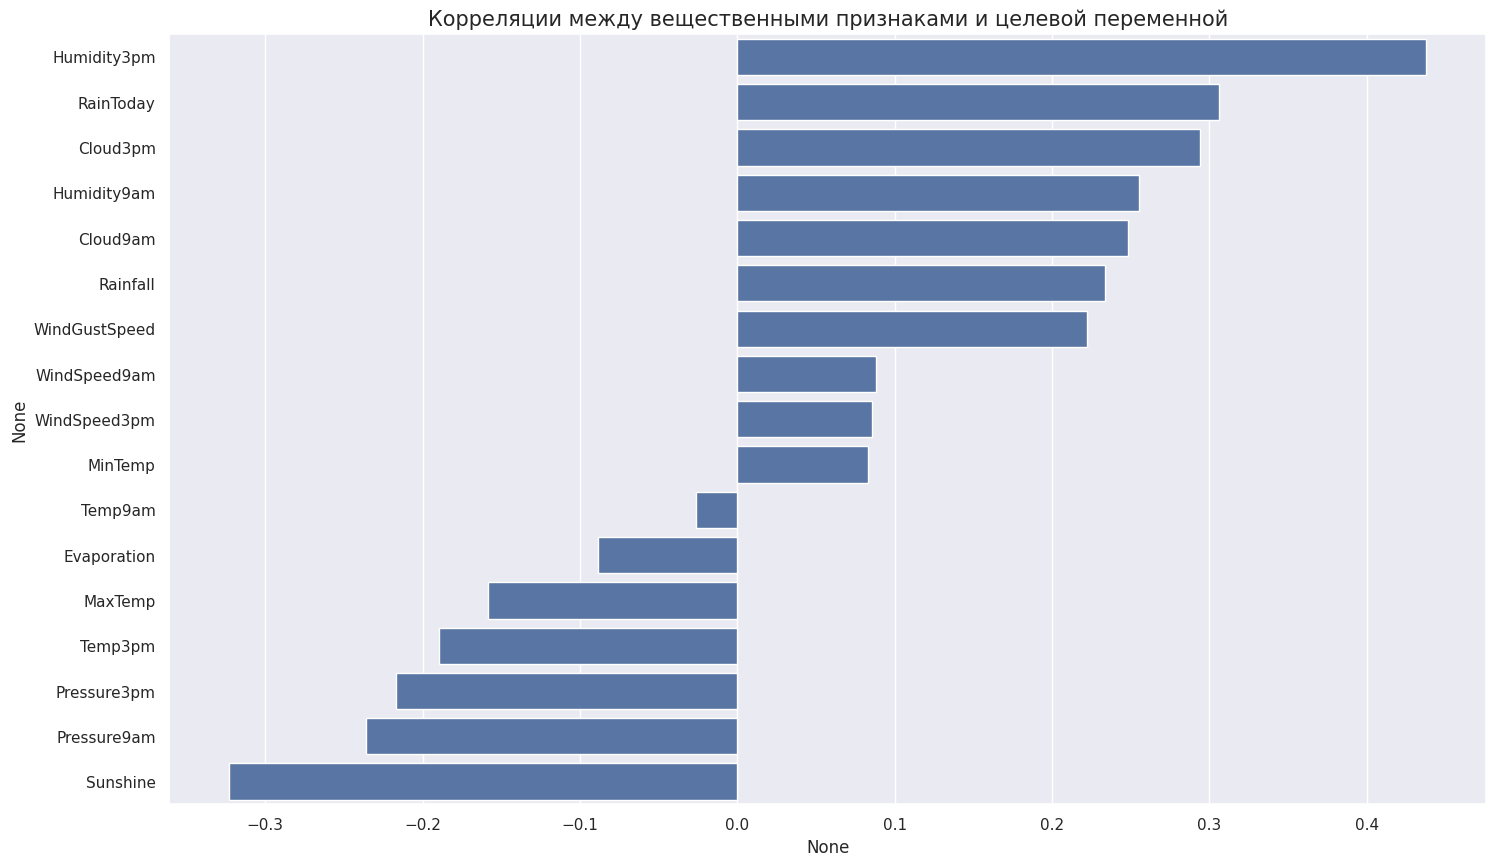

In [27]:
correlations = X_train[numeric_features].corrwith(y_train).sort_values(ascending=False)
plot = sns.barplot(y=correlations.index, x=correlations)
plot.set_title("Корреляции между вещественными признаками и целевой переменной", size=15)
plot.figure.set_size_inches(17, 10)

### <font color='DarkOrange'>**Задание 4 [2 баллa]**</font>

Попробуйте объяснить для каких-нибудь признаков получившиеся значения корреляции (почему для одних эти значения высокие, а для других низкие)?

<font color='MediumOrchid'>**Ваш ответ тут:**</font>

Значения корреляции определяются степенью прямой или косвенной связи признака с целевой переменной. Высокая корреляция возникает, если признак имеет прямое влияние или тесную связь с целевым явлением (то есть с дождем), а низкая корреляция возникает, если связь слабая, непрямая или зависимость скрыта другими факторами.

Высокие корреляции наблюдаются у признаков, которые непосредственно связаны с осадками (влажность, облачность, наличие дождя, атмосферное давление).

Низкие или умеренные корреляции у признаков, которые лишь косвенно могут указывать на вероятность дождя (температура, скорость ветра, испарение).



----

Дополнительно визуализируем признаки Sunshine и Humidity3pm. Библиотека seaborn предоставляет график swarmplot, который в отличие от scatterplot старается разместить на графике как можно больше точек, так чтобы они не пересекались, уложившись при этом в заданную ширину.

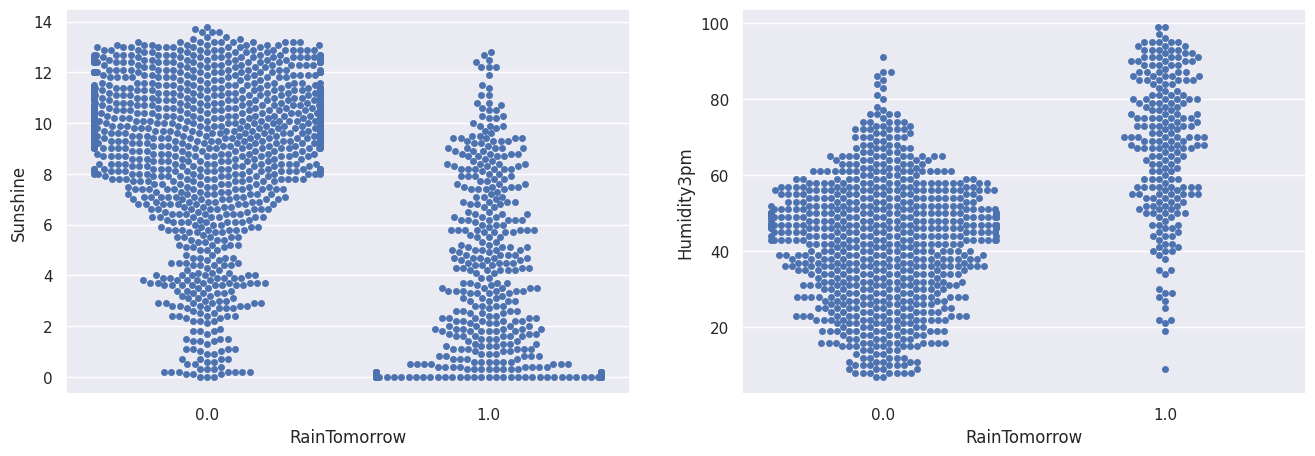

In [28]:
fig, axs = plt.subplots(figsize=(16, 5), nrows=1, ncols=2)
_ = sns.swarmplot(x="RainTomorrow", y="Sunshine", data=df.head(10000), ax=axs[0])
_ = sns.swarmplot(x="RainTomorrow", y="Humidity3pm", data=df.head(1000), ax=axs[1])

Для оценки качества классификации воспользуемся реализованными в sklearn logloss и ROC AUC. ROC AUC является метрикой по умолчанию для бинарной классификации, поскольку очень устойчива к несбалансированности классов. Подробнее про неё можно прочитать https://alexanderdyakonov.wordpress.com/2017/07/28/auc-roc-площадь-под-кривой-ошибок/ . Обучим  логистическую регрессию на вещественных признаках, не подбирая константу регуляризации

In [29]:
from sklearn.metrics import log_loss, roc_auc_score

In [30]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train[numeric_features], y_train)

LogisticRegression(max_iter=1000)

In [31]:
y_pred = model.predict_proba(X_test[numeric_features])[:, 1]
y_train_pred = model.predict_proba(X_train[numeric_features])[:, 1]

print("Test logloss = %.4f" % log_loss(y_test, y_pred))
print("Train logloss = %.4f" % log_loss(y_train, y_train_pred))
print("Test roc auc score = %.4f" % roc_auc_score(y_test, y_pred))
print("Train roc auc score = %.4f" % roc_auc_score(y_train, y_train_pred))

Test logloss = 0.3635
Train logloss = 0.3695
Test roc auc score = 0.8604
Train roc auc score = 0.8564


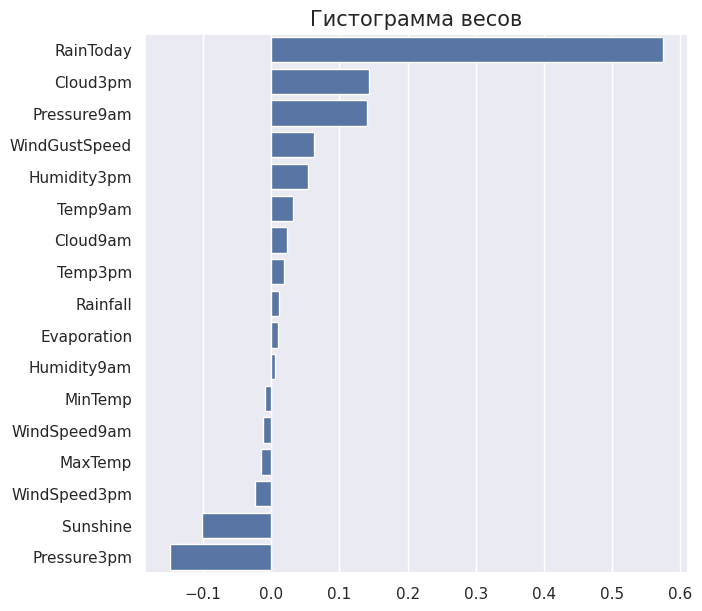

In [32]:
plt.figure(figsize=(7, 7))
sorted_weights = sorted(zip(model.coef_[0], numeric_features), reverse=True)
weights = [x[0] for x in sorted_weights]
features = [x[1] for x in sorted_weights]
_ = sns.barplot(y=features, x=weights).set_title("Гистограмма весов", size=15)

Если приглядеться к весам, то можно увидеть, что между корреляциями признаков с целевой переменной и значением соответствующих весов мало общего. Чтобы это предотвратить, будем масштабировать наши признаки перед обучением модели. Это, среди, прочего, сделает нашу регуляризацию более честной: теперь все признаки будут регуляризоваться в равной степени.

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

In [34]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [35]:
y_pred = model.predict_proba(X_test_scaled)[:, 1]
y_train_pred = model.predict_proba(X_train_scaled)[:, 1]

print("Test logloss = %.4f" % log_loss(y_test, y_pred))
print("Train logloss = %.4f" % log_loss(y_train, y_train_pred))
print("Test roc auc score = %.4f" % roc_auc_score(y_test, y_pred))
print("Train roc auc score = %.4f" % roc_auc_score(y_train, y_train_pred))

Test logloss = 0.3589
Train logloss = 0.3637
Test roc auc score = 0.8652
Train roc auc score = 0.8623


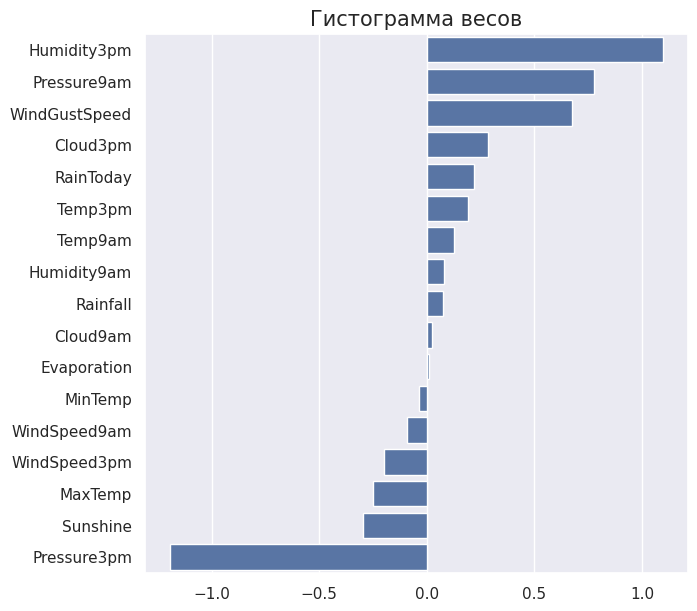

In [36]:
plt.figure(figsize=(7, 7))
sorted_weights = sorted(zip(model.coef_[0], numeric_features), reverse=True)
weights = [x[0] for x in sorted_weights]
features = [x[1] for x in sorted_weights]
_ = sns.barplot(y=features, x=weights).set_title("Гистограмма весов", size=15)

### <font color='DarkOrange'>**Задание 5 [1 балл]**</font>

Почему даже после нормализации график не до конца похож на гистограмму корреляций?

Ответ: график весов регрессии даже после нормализации не совпадает с корреляцией, так как веса отражают совокупное взаимодействие признаков в модели, а корреляция показывает индивидуальную связь каждого признака с целевой переменной.

Рассмотрим теперь категориальные признаки. Сразу отметим, что признак "Date" очень опасен, и лучше пока его выкинуть. Это связано с тем, что мы можем получить прямую информацию о том, будет ли завтра дождь, если текущее место и завтрашняя дата встречались где-то в обучающей выборке. Очень часто также встречаются признак наподобие "ID", которые могут содержать аналогичные утечки информации. С такими признаками всегда нужно обращаться осторожно!

In [37]:
categorical = list(X_train.drop(columns=["Date"]).dtypes[X_train.dtypes == "object"].index)
X_train[categorical] = X_train[categorical].fillna("NotGiven")
X_test[categorical] = X_test[categorical].fillna("NotGiven")

Для работы с категориальными признаками нужно их как-то закодировать числами. Для этого воспользуемся реализацией one-hot кодирования из библиотеки sklearn

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe', column_transformer),
    ('classification', LogisticRegression(solver='lbfgs', max_iter=200))
])

model = pipeline.fit(X_train.drop(columns=["Date"]), y_train)
y_pred = model.predict_proba(X_test.drop(columns=["Date"]))[:, 1]
print("Test logloss = %.4f" % log_loss(y_test, y_pred))
print("Test roc auc score = %.4f" % roc_auc_score(y_test, y_pred))

Test logloss = 0.3498
Test roc auc score = 0.8721


Качество немного выросло, если смотреть на ROC AUC!

### <font color='DarkOrange'>**Задание 6 [1 балл]**</font>

Почему итоговое качество выросло?

<font color='MediumOrchid'>**Ваш ответ тут:**</font>

Повышение точности может быть обусловлено тем, что one-hot кодирование предоставляет модели более информативное и корректное представление категориальных данных, позволяет их эффективно преобразовываать, что способствует лучшему обучению и предсказанию.

### <font color='DarkOrange'>**Задание 7 [2 баллa]**</font>

Попробуйте улучшить качество модели, попробовав другие гиперпараметры (например, число итераций, метод оптимизации, константу регуляризации и т.д.). Измерьте получившийся результат и напишите, благодаря чему удалось или не удалось улучшить текущие метрики

In [64]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('classification', LogisticRegression(solver='lbfgs', max_iter=200, random_state=42))
])

param_grid = {
    'classification__C': [0.01, 0.1, 1, 10, 100],
    'classification__solver': ['lbfgs', 'saga'],
    'classification__penalty': ['l2', 'none'],
    'classification__max_iter': [200, 500, 1000]
}

# Создание кросс-валидатора
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Создание объекта GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

# Обучение модели с подбором гиперпараметров
grid_search.fit(X_train, y_train)

# Вывод лучших параметров
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший ROC AUC на кросс-валидации: %.4f" % grid_search.best_score_)

# Предсказание вероятностей на тестовых данных
y_pred_proba = grid_search.predict_proba(X_test)[:, 1]

# Оценка модели
print("Test logloss = %.4f" % log_loss(y_test, y_pred_proba))
print("Test roc auc score = %.4f" % roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=0.01, classification__max_iter=200, classification__penalty=l2, classification__solver=lbfgs; total time=   1.0s
[CV] END classification__C=0.01, classification__max_iter=200, classification__penalty=l2, classification__solver=lbfgs; total time=   1.0s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will 

[CV] END classification__C=0.01, classification__max_iter=200, classification__penalty=l2, classification__solver=lbfgs; total time=   1.1s
[CV] END classification__C=0.01, classification__max_iter=200, classification__penalty=l2, classification__solver=lbfgs; total time=   1.5s
[CV] END classification__C=0.01, classification__max_iter=200, classification__penalty=l2, classification__solver=lbfgs; total time=   1.5s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will 

[CV] END classification__C=0.01, classification__max_iter=200, classification__penalty=none, classification__solver=lbfgs; total time=   1.6s
[CV] END classification__C=0.01, classification__max_iter=200, classification__penalty=none, classification__solver=lbfgs; total time=   1.4s
[CV] END classification__C=0.01, classification__max_iter=200, classification__penalty=none, classification__solver=lbfgs; total time=   1.5s
[CV] END classification__C=0.01, classification__max_iter=200, classification__penalty=none, classification__solver=lbfgs; total time=   1.5s
[CV] END classification__C=0.01, classification__max_iter=200, classification__penalty=none, classification__solver=lbfgs; total time=   1.8s
[CV] END classification__C=0.01, classification__max_iter=500, classification__penalty=l2, classification__solver=lbfgs; total time=   1.1s
[CV] END classification__C=0.01, classification__max_iter=500, classification__penalty=l2, classification__solver=lbfgs; total time=   1.0s
[CV] END c

/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=0.01, classification__max_iter=500, classification__penalty=none, classification__solver=lbfgs; total time=   1.0s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=0.01, classification__max_iter=500, classification__penalty=none, classification__solver=lbfgs; total time=   1.1s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=0.01, classification__max_iter=500, classification__penalty=none, classification__solver=lbfgs; total time=   1.1s
[CV] END classification__C=0.01, classification__max_iter=200, classification__penalty=none, classification__solver=saga; total time=   6.0s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=0.01, classification__max_iter=200, classification__penalty=none, classification__solver=saga; total time=   6.4s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=0.01, classification__max_iter=200, classification__penalty=none, classification__solver=saga; total time=   6.4s
[CV] END classification__C=0.01, classification__max_iter=200, classification__penalty=none, classification__solver=saga; total time=   7.1s
[CV] END classification__C=0.01, classification__max_iter=500, classification__penalty=none, classification__solver=lbfgs; total time=   1.0s
[CV] END classification__C=0.01, classification__max_iter=500, classification__penalty=none, classification__solver=lbfgs; total time=   1.2s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will 

[CV] END classification__C=0.01, classification__max_iter=200, classification__penalty=none, classification__solver=saga; total time=   7.1s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=0.01, classification__max_iter=1000, classification__penalty=l2, classification__solver=lbfgs; total time=   0.8s
[CV] END classification__C=0.01, classification__max_iter=1000, classification__penalty=l2, classification__solver=lbfgs; total time=   0.8s
[CV] END classification__C=0.01, classification__max_iter=1000, classification__penalty=l2, classification__solver=lbfgs; total time=   0.8s
[CV] END classification__C=0.01, classification__max_iter=1000, classification__penalty=l2, classification__solver=lbfgs; total time=   0.9s
[CV] END classification__C=0.01, classification__max_iter=1000, classification__penalty=l2, classification__solver=lbfgs; total time=   0.8s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classification__C=0.01, classification__max_iter=200, classification__penalty=l2, classification__solver=saga; total time=  12.7s
[CV] END classification__C=0.01, classification__max_iter=500, classification__penalty=none, classification__solver=saga; total time=   5.3s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classification__C=0.01, classification__max_iter=200, classification__penalty=l2, classification__solver=saga; total time=  13.3s
[CV] END classification__C=0.01, classification__max_iter=500, classification__penalty=none, classification__solver=saga; total time=   5.2s
[CV] END classification__C=0.01, classification__max_iter=200, classification__penalty=l2, classification__solver=saga; total time=  13.2s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=0.01, classification__max_iter=200, classification__penalty=l2, classification__solver=saga; total time=  13.4s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=0.01, classification__max_iter=500, classification__penalty=none, classification__solver=saga; total time=   6.3s
[CV] END classification__C=0.01, classification__max_iter=200, classification__penalty=l2, classification__solver=saga; total time=  13.8s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=0.01, classification__max_iter=500, classification__penalty=none, classification__solver=saga; total time=   6.3s
[CV] END classification__C=0.01, classification__max_iter=500, classification__penalty=none, classification__solver=saga; total time=   6.3s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=0.01, classification__max_iter=1000, classification__penalty=none, classification__solver=lbfgs; total time=   1.1s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=0.01, classification__max_iter=1000, classification__penalty=none, classification__solver=lbfgs; total time=   1.4s
[CV] END classification__C=0.01, classification__max_iter=1000, classification__penalty=none, classification__solver=lbfgs; total time=   1.2s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=0.01, classification__max_iter=1000, classification__penalty=none, classification__solver=lbfgs; total time=   1.1s
[CV] END classification__C=0.01, classification__max_iter=1000, classification__penalty=none, classification__solver=lbfgs; total time=   1.4s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=0.1, classification__max_iter=200, classification__penalty=l2, classification__solver=lbfgs; total time=   1.2s
[CV] END classification__C=0.1, classification__max_iter=200, classification__penalty=l2, classification__solver=lbfgs; total time=   1.3s
[CV] END classification__C=0.1, classification__max_iter=200, classification__penalty=l2, classification__solver=lbfgs; total time=   1.4s
[CV] END classification__C=0.01, classification__max_iter=1000, classification__penalty=none, classification__solver=saga; total time=   5.4s
[CV] END classification__C=0.01, classification__max_iter=1000, classification__penalty=none, classification__solver=saga; total time=   5.2s
[CV] END classification__C=0.01, classification__max_iter=1000, classification__penalty=none, classification__solver=saga; total time=   6.3s
[CV] END classification__C=0.1, classification__max_iter=200, classification__penalty=l2, classification__solver=lbfgs; total time=   1.3s
[CV] END classific

/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=0.1, classification__max_iter=200, classification__penalty=none, classification__solver=lbfgs; total time=   1.0s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=0.1, classification__max_iter=200, classification__penalty=none, classification__solver=lbfgs; total time=   1.0s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=0.1, classification__max_iter=200, classification__penalty=none, classification__solver=lbfgs; total time=   1.1s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=0.1, classification__max_iter=200, classification__penalty=none, classification__solver=lbfgs; total time=   1.1s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=0.1, classification__max_iter=200, classification__penalty=none, classification__solver=lbfgs; total time=   1.1s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classification__C=0.1, classification__max_iter=200, classification__penalty=l2, classification__solver=saga; total time=  11.7s
[CV] END classification__C=0.01, classification__max_iter=500, classification__penalty=l2, classification__solver=saga; total time=  30.0s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio 

[CV] END classification__C=0.01, classification__max_iter=500, classification__penalty=l2, classification__solver=saga; total time=  29.4s
[CV] END classification__C=0.1, classification__max_iter=200, classification__penalty=none, classification__solver=saga; total time=   5.7s
[CV] END classification__C=0.1, classification__max_iter=200, classification__penalty=l2, classification__solver=saga; total time=  11.6s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.

[CV] END classification__C=0.1, classification__max_iter=200, classification__penalty=l2, classification__solver=saga; total time=  12.1s
[CV] END classification__C=0.01, classification__max_iter=500, classification__penalty=l2, classification__solver=saga; total time=  29.7s
[CV] END classification__C=0.1, classification__max_iter=200, classification__penalty=l2, classification__solver=saga; total time=  12.0s
[CV] END classification__C=0.01, classification__max_iter=500, classification__penalty=l2, classification__solver=saga; total time=  29.7s
[CV] END classification__C=0.1, classification__max_iter=200, classification__penalty=l2, classification__solver=saga; total time=  11.9s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classification__C=0.01, classification__max_iter=500, classification__penalty=l2, classification__solver=saga; total time=  30.8s
[CV] END classification__C=0.1, classification__max_iter=500, classification__penalty=l2, classification__solver=lbfgs; total time=   1.5s
[CV] END classification__C=0.1, classification__max_iter=500, classification__penalty=l2, classification__solver=lbfgs; total time=   1.5s
[CV] END classification__C=0.1, classification__max_iter=500, classification__penalty=l2, classification__solver=lbfgs; total time=   1.8s
[CV] END classification__C=0.1, classification__max_iter=500, classification__penalty=l2, classification__solver=lbfgs; total time=   1.7s
[CV] END classification__C=0.1, classification__max_iter=500, classification__penalty=l2, classification__solver=lbfgs; total time=   1.9s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=0.1, classification__max_iter=500, classification__penalty=none, classification__solver=lbfgs; total time=   1.0s
[CV] END classification__C=0.1, classification__max_iter=500, classification__penalty=none, classification__solver=lbfgs; total time=   1.1s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=0.1, classification__max_iter=500, classification__penalty=none, classification__solver=lbfgs; total time=   1.1s
[CV] END classification__C=0.1, classification__max_iter=500, classification__penalty=none, classification__solver=lbfgs; total time=   1.0s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=0.1, classification__max_iter=500, classification__penalty=none, classification__solver=lbfgs; total time=   1.0s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=0.1, classification__max_iter=200, classification__penalty=none, classification__solver=saga; total time=   5.9s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=0.1, classification__max_iter=200, classification__penalty=none, classification__solver=saga; total time=   5.9s
[CV] END classification__C=0.1, classification__max_iter=200, classification__penalty=none, classification__solver=saga; total time=   6.0s
[CV] END classification__C=0.1, classification__max_iter=200, classification__penalty=none, classification__solver=saga; total time=   6.3s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=0.1, classification__max_iter=1000, classification__penalty=l2, classification__solver=lbfgs; total time=   1.2s
[CV] END classification__C=0.1, classification__max_iter=1000, classification__penalty=l2, classification__solver=lbfgs; total time=   1.3s
[CV] END classification__C=0.1, classification__max_iter=1000, classification__penalty=l2, classification__solver=lbfgs; total time=   1.3s
[CV] END classification__C=0.1, classification__max_iter=500, classification__penalty=none, classification__solver=saga; total time=   5.9s
[CV] END classification__C=0.1, classification__max_iter=500, classification__penalty=none, classification__solver=saga; total time=   5.5s
[CV] END classification__C=0.1, classification__max_iter=1000, classification__penalty=l2, classification__solver=lbfgs; total time=   1.4s
[CV] END classification__C=0.1, classification__max_iter=500, classification__penalty=none, classification__solver=saga; total time=   5.5s
[CV] END classificat

/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=0.1, classification__max_iter=1000, classification__penalty=none, classification__solver=lbfgs; total time=   1.1s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=0.1, classification__max_iter=1000, classification__penalty=none, classification__solver=lbfgs; total time=   1.1s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=0.1, classification__max_iter=1000, classification__penalty=none, classification__solver=lbfgs; total time=   1.2s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=0.1, classification__max_iter=1000, classification__penalty=none, classification__solver=lbfgs; total time=   1.2s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=0.1, classification__max_iter=1000, classification__penalty=none, classification__solver=lbfgs; total time=   1.1s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=0.1, classification__max_iter=1000, classification__penalty=none, classification__solver=saga; total time=   6.0s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=0.01, classification__max_iter=1000, classification__penalty=l2, classification__solver=saga; total time=  47.1s
[CV] END classification__C=0.01, classification__max_iter=1000, classification__penalty=l2, classification__solver=saga; total time=  47.9s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=0.01, classification__max_iter=1000, classification__penalty=l2, classification__solver=saga; total time=  47.9s
[CV] END classification__C=0.01, classification__max_iter=1000, classification__penalty=l2, classification__solver=saga; total time=  47.9s
[CV] END classification__C=0.01, classification__max_iter=1000, classification__penalty=l2, classification__solver=saga; total time=  47.9s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=0.1, classification__max_iter=1000, classification__penalty=none, classification__solver=saga; total time=   5.1s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classification__C=0.1, classification__max_iter=500, classification__penalty=l2, classification__solver=saga; total time=  29.9s
[CV] END classification__C=1, classification__max_iter=200, classification__penalty=l2, classification__solver=lbfgs; total time=   1.9s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classification__C=1, classification__max_iter=200, classification__penalty=l2, classification__solver=lbfgs; total time=   1.8s
[CV] END classification__C=0.1, classification__max_iter=500, classification__penalty=l2, classification__solver=saga; total time=  28.6s
[CV] END classification__C=1, classification__max_iter=200, classification__penalty=l2, classification__solver=lbfgs; total time=   2.1s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classification__C=0.1, classification__max_iter=500, classification__penalty=l2, classification__solver=saga; total time=  29.1s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classification__C=0.1, classification__max_iter=500, classification__penalty=l2, classification__solver=saga; total time=  29.9s
[CV] END classification__C=1, classification__max_iter=200, classification__penalty=l2, classification__solver=lbfgs; total time=   1.7s
[CV] END classification__C=1, classification__max_iter=200, classification__penalty=l2, classification__solver=lbfgs; total time=   1.9s
[CV] END classification__C=0.1, classification__max_iter=500, classification__penalty=l2, classification__solver=saga; total time=  31.6s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END classification__C=1, classification__max_iter=200, classification__penalty=none, classification__solver=lbfgs; total time=   1.0s
[CV] END classification__C=1, classification__max_iter=200, classification__penalty=none, classification__solver=lbfgs; total time=   1.1s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END classification__C=1, classification__max_iter=200, classification__penalty=none, classification__solver=lbfgs; total time=   1.2s
[CV] END classification__C=0.1, classification__max_iter=1000, classification__penalty=none, classification__solver=saga; total time=   6.1s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END classification__C=0.1, classification__max_iter=1000, classification__penalty=none, classification__solver=saga; total time=   5.9s
[CV] END classification__C=0.1, classification__max_iter=1000, classification__penalty=none, classification__solver=saga; total time=   6.6s
[CV] END classification__C=1, classification__max_iter=200, classification__penalty=none, classification__solver=lbfgs; total time=   1.1s
[CV] END classification__C=1, classification__max_iter=200, classification__penalty=none, classification__solver=lbfgs; total time=   1.0s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END classification__C=1, classification__max_iter=200, classification__penalty=l2, classification__solver=saga; total time=   5.5s
[CV] END classification__C=1, classification__max_iter=500, classification__penalty=l2, classification__solver=lbfgs; total time=   1.7s
[CV] END classification__C=1, classification__max_iter=200, classification__penalty=l2, classification__solver=saga; total time=   5.5s
[CV] END classification__C=1, classification__max_iter=200, classification__penalty=l2, classification__solver=saga; total time=   6.4s
[CV] END classification__C=1, classification__max_iter=200, classification__penalty=l2, classification__solver=saga; total time=   6.3s
[CV] END classification__C=1, classification__max_iter=200, classification__penalty=l2, classification__solver=saga; total time=   5.6s
[CV] END classification__C=1, classification__max_iter=500, classification__penalty=l2, classification__solver=lbfgs; total time=   1.9s
[CV] END classification__C=1, classification__

/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END classification__C=1, classification__max_iter=200, classification__penalty=none, classification__solver=saga; total time=   5.8s
[CV] END classification__C=1, classification__max_iter=500, classification__penalty=none, classification__solver=lbfgs; total time=   1.0s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END classification__C=1, classification__max_iter=200, classification__penalty=none, classification__solver=saga; total time=   5.8s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END classification__C=1, classification__max_iter=200, classification__penalty=none, classification__solver=saga; total time=   6.0s
[CV] END classification__C=1, classification__max_iter=200, classification__penalty=none, classification__solver=saga; total time=   6.2s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END classification__C=1, classification__max_iter=200, classification__penalty=none, classification__solver=saga; total time=   7.0s
[CV] END classification__C=1, classification__max_iter=500, classification__penalty=none, classification__solver=lbfgs; total time=   1.2s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END classification__C=1, classification__max_iter=500, classification__penalty=none, classification__solver=lbfgs; total time=   1.2s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END classification__C=1, classification__max_iter=500, classification__penalty=none, classification__solver=lbfgs; total time=   1.2s
[CV] END classification__C=1, classification__max_iter=500, classification__penalty=none, classification__solver=lbfgs; total time=   1.1s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END classification__C=1, classification__max_iter=500, classification__penalty=l2, classification__solver=saga; total time=   5.6s
[CV] END classification__C=1, classification__max_iter=1000, classification__penalty=l2, classification__solver=lbfgs; total time=   1.8s
[CV] END classification__C=1, classification__max_iter=500, classification__penalty=l2, classification__solver=saga; total time=   6.5s
[CV] END classification__C=1, classification__max_iter=500, classification__penalty=l2, classification__solver=saga; total time=   5.4s
[CV] END classification__C=1, classification__max_iter=500, classification__penalty=l2, classification__solver=saga; total time=   5.8s
[CV] END classification__C=1, classification__max_iter=500, classification__penalty=l2, classification__solver=saga; total time=   6.4s
[CV] END classification__C=1, classification__max_iter=1000, classification__penalty=l2, classification__solver=lbfgs; total time=   1.9s
[CV] END classification__C=1, classification

/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END classification__C=1, classification__max_iter=500, classification__penalty=none, classification__solver=saga; total time=   5.7s
[CV] END classification__C=1, classification__max_iter=500, classification__penalty=none, classification__solver=saga; total time=   6.0s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END classification__C=1, classification__max_iter=1000, classification__penalty=none, classification__solver=lbfgs; total time=   1.1s
[CV] END classification__C=1, classification__max_iter=500, classification__penalty=none, classification__solver=saga; total time=   6.2s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END classification__C=1, classification__max_iter=500, classification__penalty=none, classification__solver=saga; total time=   5.9s
[CV] END classification__C=1, classification__max_iter=500, classification__penalty=none, classification__solver=saga; total time=   6.8s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END classification__C=1, classification__max_iter=1000, classification__penalty=none, classification__solver=lbfgs; total time=   1.2s
[CV] END classification__C=1, classification__max_iter=1000, classification__penalty=none, classification__solver=lbfgs; total time=   1.2s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END classification__C=1, classification__max_iter=1000, classification__penalty=none, classification__solver=lbfgs; total time=   1.3s
[CV] END classification__C=1, classification__max_iter=1000, classification__penalty=none, classification__solver=lbfgs; total time=   1.3s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END classification__C=10, classification__max_iter=200, classification__penalty=l2, classification__solver=lbfgs; total time=   1.0s
[CV] END classification__C=1, classification__max_iter=1000, classification__penalty=l2, classification__solver=saga; total time=   5.6s
[CV] END classification__C=1, classification__max_iter=1000, classification__penalty=l2, classification__solver=saga; total time=   6.3s
[CV] END classification__C=10, classification__max_iter=200, classification__penalty=l2, classification__solver=lbfgs; total time=   1.2s
[CV] END classification__C=1, classification__max_iter=1000, classification__penalty=l2, classification__solver=saga; total time=   5.5s
[CV] END classification__C=1, classification__max_iter=1000, classification__penalty=l2, classification__solver=saga; total time=   5.5s
[CV] END classification__C=10, classification__max_iter=200, classification__penalty=l2, classification__solver=lbfgs; total time=   1.1s
[CV] END classification__C=1, classifi

/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=10, classification__max_iter=200, classification__penalty=none, classification__solver=lbfgs; total time=   1.0s
[CV] END classification__C=1, classification__max_iter=1000, classification__penalty=none, classification__solver=saga; total time=   5.7s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=1, classification__max_iter=1000, classification__penalty=none, classification__solver=saga; total time=   5.6s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=1, classification__max_iter=1000, classification__penalty=none, classification__solver=saga; total time=   6.8s
[CV] END classification__C=10, classification__max_iter=200, classification__penalty=none, classification__solver=lbfgs; total time=   1.1s
[CV] END classification__C=10, classification__max_iter=200, classification__penalty=none, classification__solver=lbfgs; total time=   1.2s
[CV] END classification__C=1, classification__max_iter=1000, classification__penalty=none, classification__solver=saga; total time=   6.4s
[CV] END classification__C=1, classification__max_iter=1000, classification__penalty=none, classification__solver=saga; total time=   6.0s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will 

[CV] END classification__C=10, classification__max_iter=200, classification__penalty=none, classification__solver=lbfgs; total time=   1.2s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=10, classification__max_iter=200, classification__penalty=none, classification__solver=lbfgs; total time=   1.2s
[CV] END classification__C=10, classification__max_iter=500, classification__penalty=l2, classification__solver=lbfgs; total time=   1.0s
[CV] END classification__C=10, classification__max_iter=200, classification__penalty=l2, classification__solver=saga; total time=   5.5s
[CV] END classification__C=10, classification__max_iter=200, classification__penalty=l2, classification__solver=saga; total time=   5.5s
[CV] END classification__C=10, classification__max_iter=200, classification__penalty=l2, classification__solver=saga; total time=   5.7s
[CV] END classification__C=10, classification__max_iter=200, classification__penalty=l2, classification__solver=saga; total time=   6.0s
[CV] END classification__C=10, classification__max_iter=200, classification__penalty=l2, classification__solver=saga; total time=   6.4s
[CV] END classification__C=10, classi

/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=10, classification__max_iter=500, classification__penalty=none, classification__solver=lbfgs; total time=   1.0s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=10, classification__max_iter=200, classification__penalty=none, classification__solver=saga; total time=   5.7s
[CV] END classification__C=10, classification__max_iter=200, classification__penalty=none, classification__solver=saga; total time=   5.7s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=10, classification__max_iter=200, classification__penalty=none, classification__solver=saga; total time=   6.1s
[CV] END classification__C=10, classification__max_iter=200, classification__penalty=none, classification__solver=saga; total time=   5.6s
[CV] END classification__C=10, classification__max_iter=500, classification__penalty=none, classification__solver=lbfgs; total time=   1.1s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will 

[CV] END classification__C=10, classification__max_iter=200, classification__penalty=none, classification__solver=saga; total time=   6.7s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=10, classification__max_iter=500, classification__penalty=none, classification__solver=lbfgs; total time=   1.2s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=10, classification__max_iter=500, classification__penalty=none, classification__solver=lbfgs; total time=   1.3s
[CV] END classification__C=10, classification__max_iter=500, classification__penalty=none, classification__solver=lbfgs; total time=   1.1s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=10, classification__max_iter=1000, classification__penalty=l2, classification__solver=lbfgs; total time=   1.0s
[CV] END classification__C=10, classification__max_iter=500, classification__penalty=l2, classification__solver=saga; total time=   5.7s
[CV] END classification__C=10, classification__max_iter=500, classification__penalty=l2, classification__solver=saga; total time=   5.5s
[CV] END classification__C=10, classification__max_iter=500, classification__penalty=l2, classification__solver=saga; total time=   6.2s
[CV] END classification__C=10, classification__max_iter=500, classification__penalty=l2, classification__solver=saga; total time=   6.3s
[CV] END classification__C=10, classification__max_iter=1000, classification__penalty=l2, classification__solver=lbfgs; total time=   1.0s
[CV] END classification__C=10, classification__max_iter=500, classification__penalty=l2, classification__solver=saga; total time=   5.8s
[CV] END classification__C=10, classi

/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=10, classification__max_iter=1000, classification__penalty=none, classification__solver=lbfgs; total time=   1.1s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=10, classification__max_iter=500, classification__penalty=none, classification__solver=saga; total time=   5.9s
[CV] END classification__C=10, classification__max_iter=500, classification__penalty=none, classification__solver=saga; total time=   5.9s
[CV] END classification__C=10, classification__max_iter=500, classification__penalty=none, classification__solver=saga; total time=   5.6s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=10, classification__max_iter=500, classification__penalty=none, classification__solver=saga; total time=   6.4s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=10, classification__max_iter=1000, classification__penalty=none, classification__solver=lbfgs; total time=   1.1s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=10, classification__max_iter=500, classification__penalty=none, classification__solver=saga; total time=   5.9s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=10, classification__max_iter=1000, classification__penalty=none, classification__solver=lbfgs; total time=   1.2s
[CV] END classification__C=10, classification__max_iter=1000, classification__penalty=none, classification__solver=lbfgs; total time=   1.2s
[CV] END classification__C=10, classification__max_iter=1000, classification__penalty=none, classification__solver=lbfgs; total time=   1.5s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=100, classification__max_iter=200, classification__penalty=l2, classification__solver=lbfgs; total time=   1.0s
[CV] END classification__C=10, classification__max_iter=1000, classification__penalty=l2, classification__solver=saga; total time=   6.0s
[CV] END classification__C=10, classification__max_iter=1000, classification__penalty=l2, classification__solver=saga; total time=   5.6s
[CV] END classification__C=100, classification__max_iter=200, classification__penalty=l2, classification__solver=lbfgs; total time=   1.0s
[CV] END classification__C=10, classification__max_iter=1000, classification__penalty=l2, classification__solver=saga; total time=   6.1s
[CV] END classification__C=10, classification__max_iter=1000, classification__penalty=l2, classification__solver=saga; total time=   6.0s
[CV] END classification__C=10, classification__max_iter=1000, classification__penalty=l2, classification__solver=saga; total time=   6.9s
[CV] END classification__C=100, 

/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=0.1, classification__max_iter=1000, classification__penalty=l2, classification__solver=saga; total time= 1.0min


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=100, classification__max_iter=200, classification__penalty=none, classification__solver=lbfgs; total time=   1.2s
[CV] END classification__C=100, classification__max_iter=200, classification__penalty=none, classification__solver=lbfgs; total time=   1.1s
[CV] END classification__C=0.1, classification__max_iter=1000, classification__penalty=l2, classification__solver=saga; total time= 1.0min


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio 

[CV] END classification__C=0.1, classification__max_iter=1000, classification__penalty=l2, classification__solver=saga; total time= 1.0min


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=10, classification__max_iter=1000, classification__penalty=none, classification__solver=saga; total time=   6.1s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=100, classification__max_iter=200, classification__penalty=none, classification__solver=lbfgs; total time=   1.2s
[CV] END classification__C=10, classification__max_iter=1000, classification__penalty=none, classification__solver=saga; total time=   5.9s
[CV] END classification__C=10, classification__max_iter=1000, classification__penalty=none, classification__solver=saga; total time=   6.9s
[CV] END classification__C=100, classification__max_iter=200, classification__penalty=none, classification__solver=lbfgs; total time=   1.2s
[CV] END classification__C=100, classification__max_iter=200, classification__penalty=none, classification__solver=lbfgs; total time=   1.1s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio 

[CV] END classification__C=0.1, classification__max_iter=1000, classification__penalty=l2, classification__solver=saga; total time= 1.0min
[CV] END classification__C=10, classification__max_iter=1000, classification__penalty=none, classification__solver=saga; total time=   6.5s
[CV] END classification__C=10, classification__max_iter=1000, classification__penalty=none, classification__solver=saga; total time=   7.1s
[CV] END classification__C=0.1, classification__max_iter=1000, classification__penalty=l2, classification__solver=saga; total time= 1.1min


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classification__C=100, classification__max_iter=500, classification__penalty=l2, classification__solver=lbfgs; total time=   1.2s
[CV] END classification__C=100, classification__max_iter=500, classification__penalty=l2, classification__solver=lbfgs; total time=   1.4s
[CV] END classification__C=100, classification__max_iter=500, classification__penalty=l2, classification__solver=lbfgs; total time=   1.3s
[CV] END classification__C=100, classification__max_iter=500, classification__penalty=l2, classification__solver=lbfgs; total time=   1.1s
[CV] END classification__C=100, classification__max_iter=500, classification__penalty=l2, classification__solver=lbfgs; total time=   1.6s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=100, classification__max_iter=200, classification__penalty=l2, classification__solver=saga; total time=   6.1s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=100, classification__max_iter=200, classification__penalty=l2, classification__solver=saga; total time=   6.4s
[CV] END classification__C=100, classification__max_iter=500, classification__penalty=none, classification__solver=lbfgs; total time=   1.0s
[CV] END classification__C=100, classification__max_iter=200, classification__penalty=l2, classification__solver=saga; total time=   6.8s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will 

[CV] END classification__C=100, classification__max_iter=200, classification__penalty=l2, classification__solver=saga; total time=   6.3s
[CV] END classification__C=100, classification__max_iter=200, classification__penalty=l2, classification__solver=saga; total time=   6.6s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=100, classification__max_iter=500, classification__penalty=none, classification__solver=lbfgs; total time=   1.1s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=100, classification__max_iter=500, classification__penalty=none, classification__solver=lbfgs; total time=   1.2s
[CV] END classification__C=100, classification__max_iter=500, classification__penalty=none, classification__solver=lbfgs; total time=   1.2s
[CV] END classification__C=100, classification__max_iter=500, classification__penalty=none, classification__solver=lbfgs; total time=   1.4s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=100, classification__max_iter=1000, classification__penalty=l2, classification__solver=lbfgs; total time=   1.1s
[CV] END classification__C=100, classification__max_iter=200, classification__penalty=none, classification__solver=saga; total time=   6.6s
[CV] END classification__C=100, classification__max_iter=200, classification__penalty=none, classification__solver=saga; total time=   7.1s
[CV] END classification__C=100, classification__max_iter=200, classification__penalty=none, classification__solver=saga; total time=   6.2s
[CV] END classification__C=100, classification__max_iter=200, classification__penalty=none, classification__solver=saga; total time=   6.5s
[CV] END classification__C=100, classification__max_iter=200, classification__penalty=none, classification__solver=saga; total time=   6.6s
[CV] END classification__C=100, classification__max_iter=1000, classification__penalty=l2, classification__solver=lbfgs; total time=   1.3s
[CV] END classificat

/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will 

[CV] END classification__C=100, classification__max_iter=500, classification__penalty=l2, classification__solver=saga; total time=   7.4s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=100, classification__max_iter=500, classification__penalty=l2, classification__solver=saga; total time=   7.0s
[CV] END classification__C=100, classification__max_iter=1000, classification__penalty=none, classification__solver=lbfgs; total time=   1.1s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=100, classification__max_iter=1000, classification__penalty=none, classification__solver=lbfgs; total time=   1.4s
[CV] END classification__C=100, classification__max_iter=1000, classification__penalty=none, classification__solver=lbfgs; total time=   1.4s
[CV] END classification__C=100, classification__max_iter=1000, classification__penalty=none, classification__solver=lbfgs; total time=   1.4s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=100, classification__max_iter=1000, classification__penalty=none, classification__solver=lbfgs; total time=   1.2s


/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/andrey/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END classification__C=100, classification__max_iter=500, classification__penalty=none, classification__solver=saga; total time=   6.3s
[CV] END classification__C=100, classification__max_iter=500, classification__penalty=none, classification__solver=saga; total time=   6.8s
[CV] END classification__C=100, classification__max_iter=500, classification__penalty=none, classification__solver=saga; total time=   6.6s
[CV] END classification__C=100, classification__max_iter=500, classification__penalty=none, classification__solver=saga; total time=   6.0s
[CV] END classification__C=100, classification__max_iter=500, classification__penalty=none, classification__solver=saga; total time=   6.3s
[CV] END classification__C=100, classification__max_iter=1000, classification__penalty=l2, classification__solver=saga; total time=   5.1s
[CV] END classification__C=100, classification__max_iter=1000, classification__penalty=l2, classification__solver=saga; total time=   5.9s
[CV] END classificatio

<font color='MediumOrchid'>**Ваш ответ тут:**</font>

С помощью Grid Search удалось найти другие параметры:

{'classification__C': 0.1, 'classification__max_iter': 200, 'classification__penalty': 'l2', 'classification__solver': 'saga'}

Но модель от этого почти не улучшилась:

Test logloss = 0.3498

Test roc auc score = 0.8722

**Выводы** Во второй части задания по линейным моделям мы должны были узнать:
.

1.   Зачем нужно нормализовать данные.
2.   Как работать с вещественными и категориальными признаками.
3.   Как интерпретировать результат обучения линейной модели, опираясь на описание обучающих данных

-----------
<font color="white" style="opacity:0.2023"></font>

## <font color='MediumSeaGreen'> **Задание [Bonus][2 балла]** </font>

Вставьте мем или красивую картинку связанные с чем-то из:


1.   Страна, данные о которой мы анализировали
2.   Линейные модели
3.   Погода
4.   Динозавры

![DALL·E 2024-11-22 22.22.51 - A group of dinosaurs in a lush Australian rainforest during a heavy rainstorm. The scene features tall eucalyptus trees, vibrant ferns, and a moody, c.webp](<attachment:DALL·E 2024-11-22 22.22.51 - A group of dinosaurs in a lush Australian rainforest during a heavy rainstorm. The scene features tall eucalyptus trees, vibrant ferns, and a moody, c.webp>)
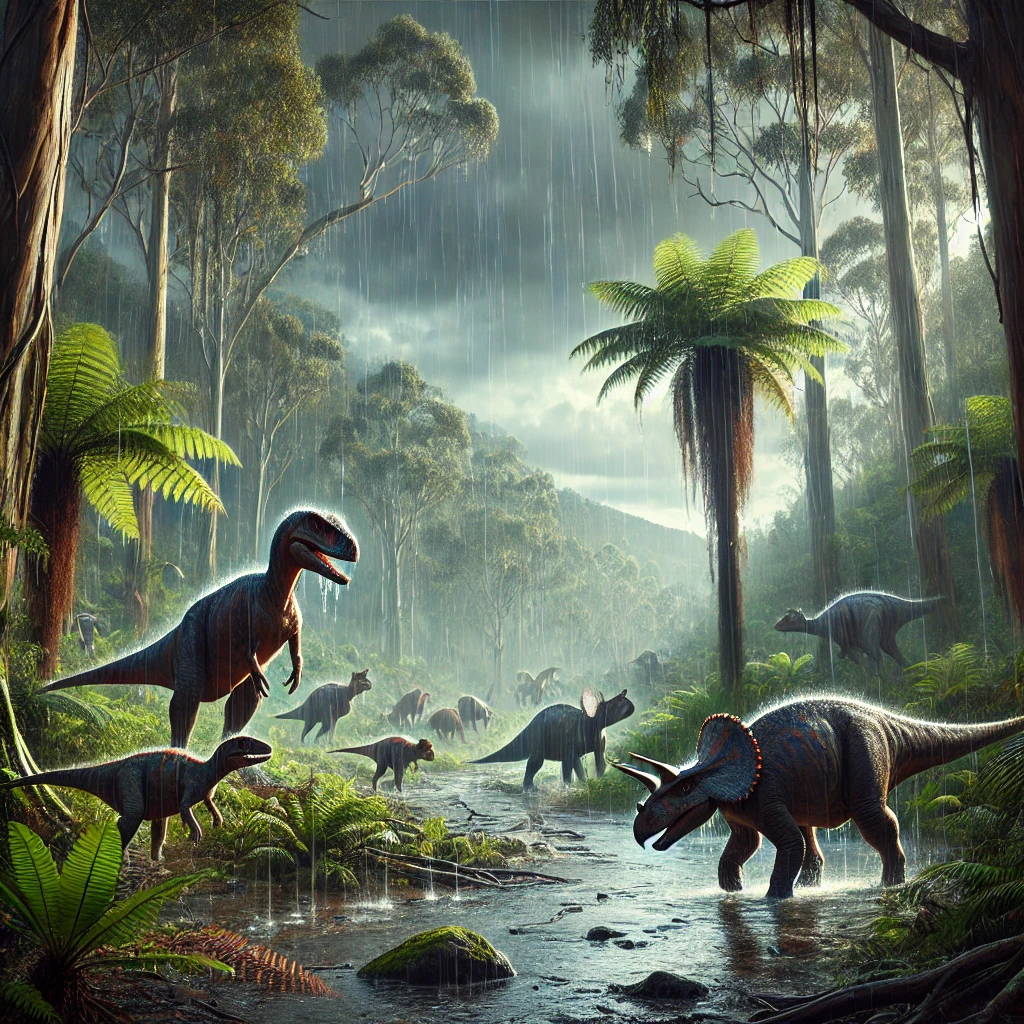